In [ ]:
"""
Example of how to get the ground truth data for a DIC microscopy image

It includes:
CellTopology, CellInstance, CellSemantic (binary), DIC with cell contours
"""

In [1]:
from cellpose import models, io
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as skio
from scipy.ndimage import distance_transform_edt
import matplotlib.colors as mcolors


model = models.Cellpose(gpu=False, model_type='cyto')

image_path = r'E:\Data_sets\ISL_Cell_Seg\tiff\TWDIC3_w4Cy5_s15.TIF'
image = skio.imread(image_path)

# Grayscale
channels = [0,0] 

masks, flows, styles, diams = model.eval([image], diameter=None, channels=channels, flow_threshold=None, cellprob_threshold=0.5)

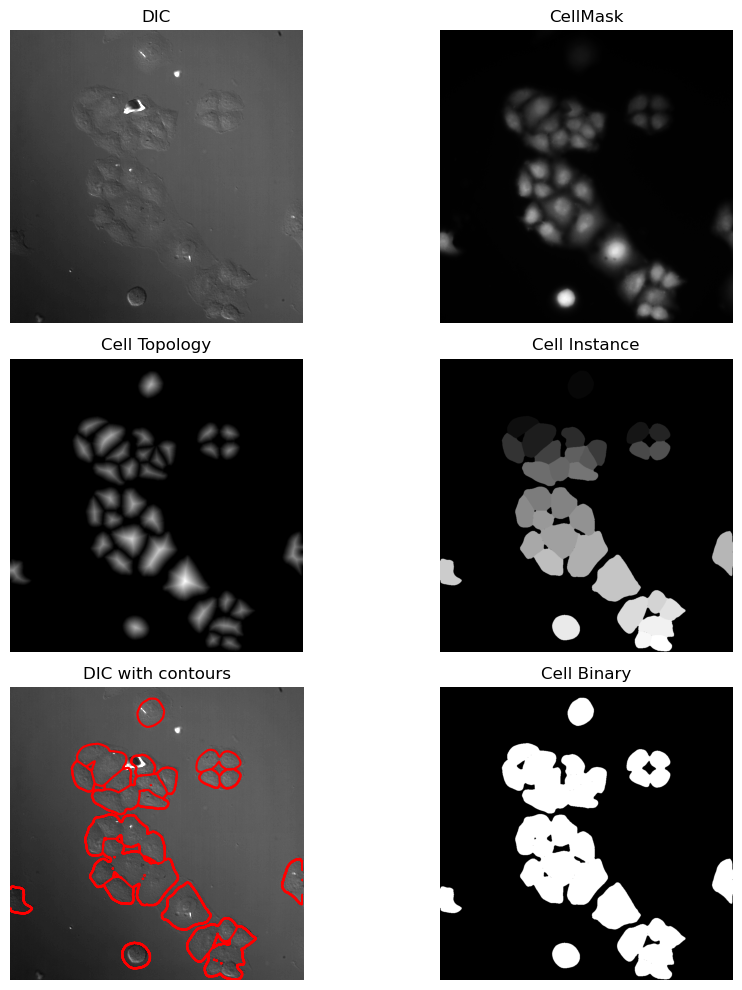

In [2]:
image_path_dic = r'E:\Data_sets\ISL_Cell_Seg\tiff\TWDIC3_w5DIC-oil-40x_s15.TIF'
image_dic = skio.imread(image_path_dic)
# Add brightness to DIC image
vmin, vmax = image_dic.min(), image_dic.max() * 0.3

# Generate distance map - topology from instance segmentation image
unique_elements = np.unique(masks[0][masks[0] > 0]) 
combined_distance_map = np.zeros_like(masks[0])

# Distance map for each instance
for element in unique_elements:
    mask = (masks[0] == element)
    distance_map = distance_transform_edt(mask)
    combined_distance_map[mask] = distance_map[mask]


fig, axs = plt.subplots(3, 2, figsize=(10, 10))  

# [0,0]
ax1 = axs[0, 0]
ax1.imshow(image_dic[4], cmap='gray',vmin=vmin, vmax=vmax)
ax1.set_title('DIC')
ax1.axis('off')

# [0,1]
ax2 = axs[0, 1]
ax2.imshow(image[4], cmap='gray')
ax2.set_title('CellMask')
ax2.axis('off')

# [1,0]
ax3 = axs[1, 0]
ax3.imshow(combined_distance_map, cmap='gray')
ax3.set_title('Cell Topology')
ax3.axis('off')

# [1,1]
ax4 = axs[1, 1]
ax4.imshow(masks[0], cmap='binary_r')
ax4.set_title('Cell Instance')
ax4.axis('off')

# [2,0]
ax5 = axs[2, 0]
ax5.imshow(image_dic[4], cmap='gray',vmin=vmin, vmax=vmax)
ax5.contour(masks[0], colors='r')
ax5.set_title('DIC with contours')
ax5.axis('off')

# [2,1]
ax6 = axs[2, 1]
mask_bin = masks[0] < 1
ax6.imshow(mask_bin, cmap='binary')
ax6.set_title('Cell Binary')
ax6.axis('off')

plt.tight_layout()

plt.savefig(r'C:\Users\Marcel\OneDrive\Thesis\ISL\all_cell_plots.png')
plt.show()

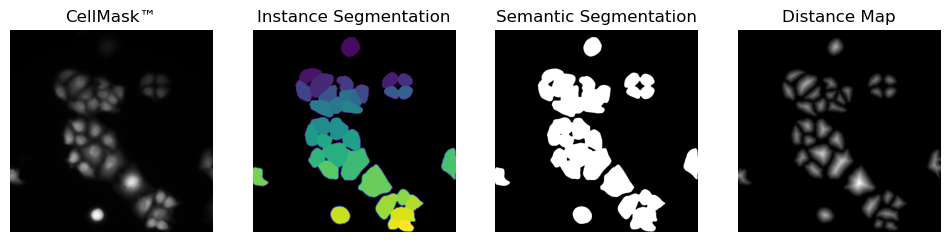

In [18]:
# Plot for thesis

# Custom cmap for black background plot
base_cmap = plt.cm.viridis
colors = [(0,0,0)] + [base_cmap(i) for i in range(1,256)]
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

fig, axs = plt.subplots(1, 4, figsize=(12, 5))

axs[0].imshow(image[4], cmap='gray')
axs[0].set_title('CellMask™')  
axs[0].axis('off')  

axs[1].imshow(masks[0], cmap=custom_cmap)
axs[1].set_title('Instance Segmentation')  
axs[1].axis('off') 

axs[2].imshow(mask_bin, cmap='binary')
axs[2].set_title('Semantic Segmentation')  
axs[2].axis('off')  

axs[3].imshow(combined_distance_map, cmap='gray')
axs[3].set_title('Distance Map') 
axs[3].axis('off')  

plt.savefig(r'C:\Users\Marcel\OneDrive\Thesis\ISL\cellmask_all.png')

plt.show()

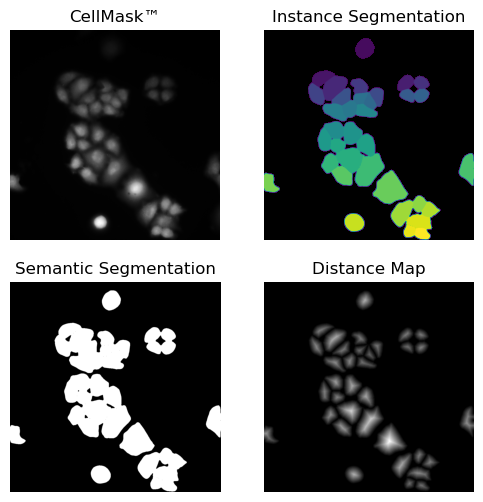

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(6,6))  

# [0,0]
ax1 = axs[0, 0]
ax1.imshow(image[4], cmap='gray')
ax1.set_title('CellMask™') 
ax1.axis('off')

# [0,0]
ax1 = axs[0, 1]
ax1.imshow(masks[0], cmap=custom_cmap)
ax1.set_title('Instance Segmentation')  
ax1.axis('off')

# [0,0]
ax1 = axs[1, 0]
ax1.imshow(mask_bin, cmap='binary')
ax1.set_title('Semantic Segmentation')
ax1.axis('off')

# [0,0]
ax1 = axs[1, 1]
ax1.imshow(combined_distance_map, cmap='gray')
ax1.set_title('Distance Map') 
ax1.axis('off')

 
plt.savefig(r'C:\Users\Marcel\OneDrive\Thesis\ISL\cellmask_all_big.png')
plt.show()